In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
%matplotlib inline

# 데이터 불러오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./submission.csv')

In [14]:
col = [
    'bant_submit', #MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율
    'id_strategic_ver', # 도메인 지식을 반영한 특정 사업부에 대한 가중치
    'it_strategic_ver', # 도메인 지식을 반영한 특정 사업 영역에 대한 가중치
    'idit_strategic_ver', # 두 가중치 중 하나라도 1의 값을 가지면 1 값으로 표현
    'ver_cus', # 특정 vertical level 1 이면서 Customer_type이 소비자인 경우에 대한 가중치
    'ver_pro', # 특정 vertical level 1 이면서 특정 Product Category인 경우에 대한 가중치
    'is_converted',
]

In [15]:
df_train = df_train[col]
df_test = df_test[col]

In [16]:
# True로 예측된 개수
num_true = sum(df_train['is_converted'] == 1)
print(f'Number of Total Train length: {len(df_train)}')
print(f"Number of True: {num_true}")
print(f'Number of Total Test length: {len(df_test)}')

Number of Total Train length: 59299
Number of True: 4850
Number of Total Test length: 5271


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         59299 non-null  float64
 1   id_strategic_ver    3444 non-null   float64
 2   it_strategic_ver    1121 non-null   float64
 3   idit_strategic_ver  4565 non-null   float64
 4   ver_cus             59299 non-null  int64  
 5   ver_pro             59299 non-null  int64  
 6   is_converted        59299 non-null  bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 2.8 MB


# bant_submit

In [18]:
print(df_train['bant_submit'].unique())
print(df_test['bant_submit'].unique())

[1.   0.75 0.5  0.25 0.  ]
[0.   0.25 1.   0.5  0.75]


# id_strategic_ver

In [19]:
df_train['id_strategic_ver'] = df_train['id_strategic_ver'].fillna(0).astype('int64')
df_test['id_strategic_ver'] = df_test['id_strategic_ver'].fillna(0).astype('int64')

In [20]:
print(df_train['id_strategic_ver'].unique())
print(df_test['id_strategic_ver'].unique())

[0 1]
[0 1]


In [9]:
df_train.loc[df_train['id_strategic_ver'] != 1]['business_unit'].unique()

KeyError: 'business_unit'

# it_strategic_ver 

In [21]:
df_train['it_strategic_ver'] = df_train['it_strategic_ver'].fillna(0).astype('int64')
df_test['it_strategic_ver'] = df_test['it_strategic_ver'].fillna(0).astype('int64')

In [10]:
df_train.loc[df_train['it_strategic_ver'] == 1]['business_unit'].unique()

KeyError: 'business_unit'

# idit_strategic_ver

In [22]:
df_train['idit_strategic_ver'] = df_train['idit_strategic_ver'].fillna(0).astype('int64')
df_test['idit_strategic_ver'] = df_test['idit_strategic_ver'].fillna(0).astype('int64')

In [12]:
df_train.loc[df_train['idit_strategic_ver'] == 1]['business_unit'].unique()

KeyError: 'business_unit'

# ver_cus

In [71]:
df_train['ver_cus'].unique()

array([1, 0])

In [72]:
df_train.loc[df_train['idit_strategic_ver'] == 1]['customer_type'].unique()

KeyError: 'customer_type'

# ver_pro

In [73]:
df_train['ver_pro'].unique()

array([0, 1])

In [74]:
df_train.loc[df_train['idit_strategic_ver'] == 1]['product_category'].unique()

KeyError: 'product_category'

In [75]:
df_train.loc[df_train['idit_strategic_ver'] != 1]['product_category'].unique()

KeyError: 'product_category'

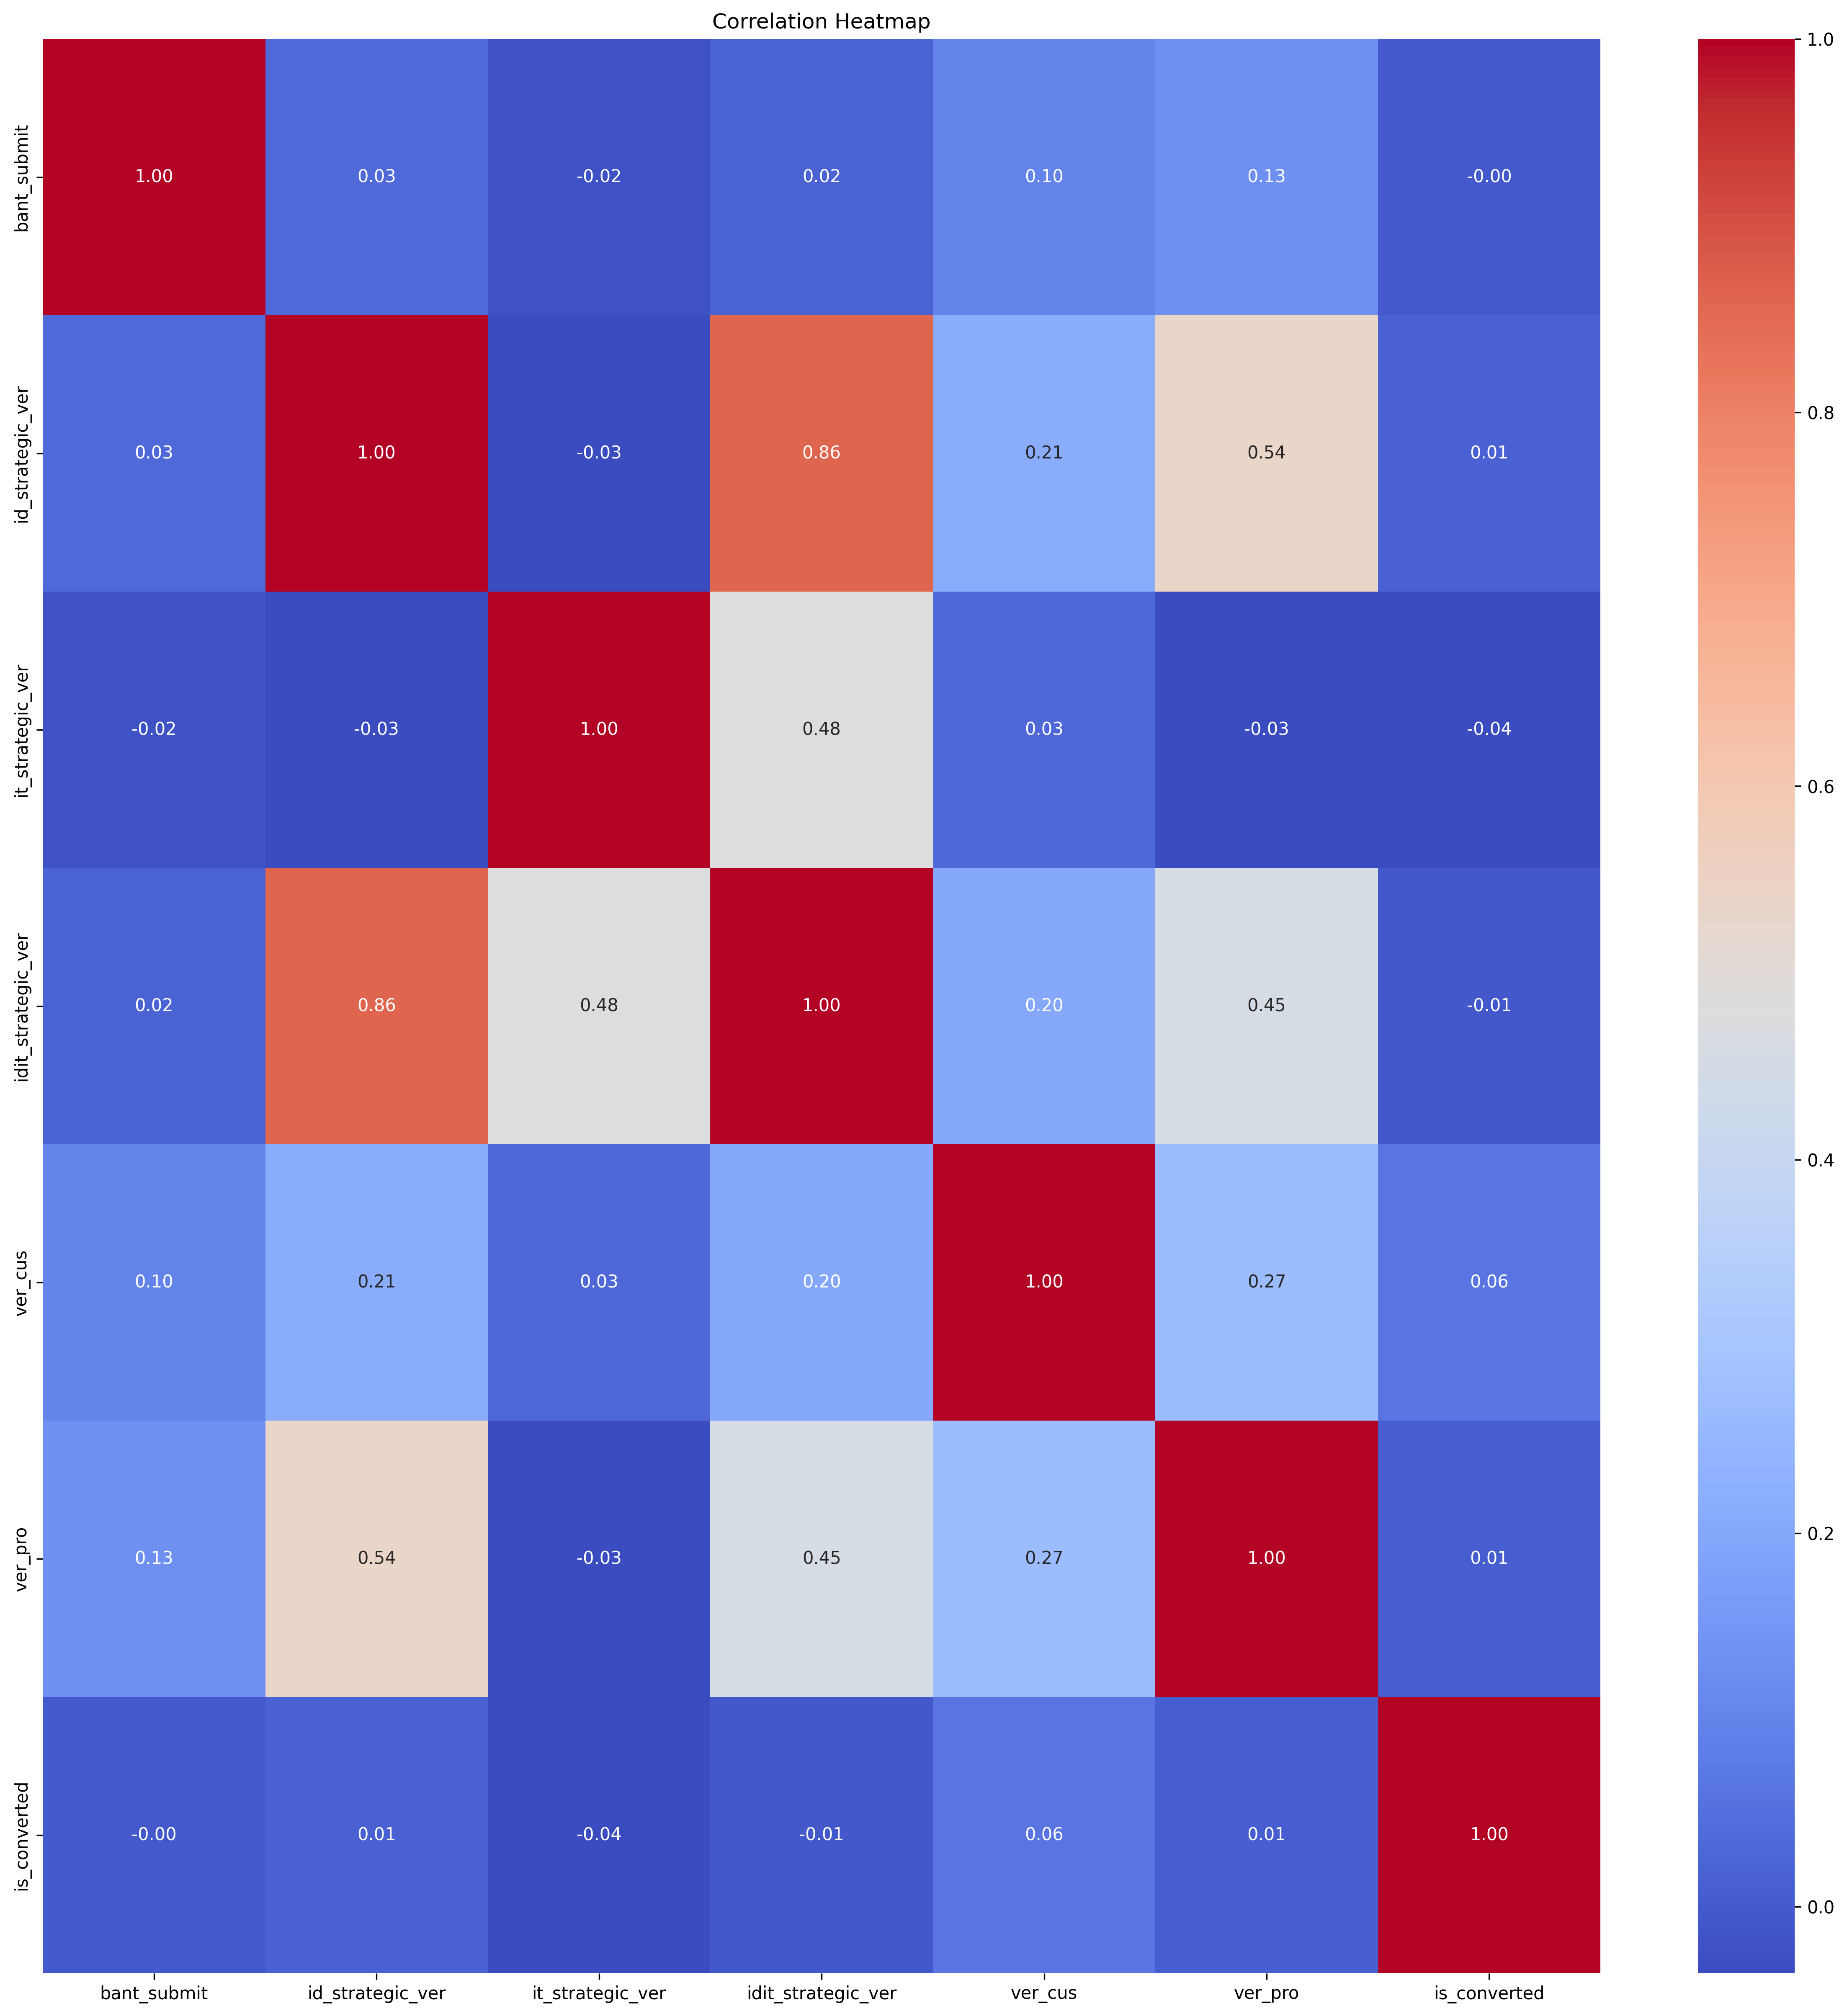

In [23]:
# 'is_converted'를 숫자형으로 변환 (True/False를 1/0으로)
df_train['is_converted'] = df_train['is_converted'].astype(int)

# 수치형 특성 선택
numerical_features = df_train.select_dtypes(include=['float64', 'int64', 'bool']).columns.tolist()

# 상관계수 계산
correlation_matrix = df_train[numerical_features].corr()

# 히트맵 생성
plt.figure(figsize=(20, 20), dpi = 300)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
#plt.savefig('./corr.png') 

In [24]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         59299 non-null  float64
 1   id_strategic_ver    59299 non-null  int64  
 2   it_strategic_ver    59299 non-null  int64  
 3   idit_strategic_ver  59299 non-null  int64  
 4   ver_cus             59299 non-null  int64  
 5   ver_pro             59299 non-null  int64  
 6   is_converted        59299 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 3.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bant_submit         5271 non-null   float64
 1   id_strategic_ver    5271 non-null   int64  
 2   it_strategic_ver    5271 non-null   int64  
 3   idit_strategic_ver  5271 non-null   int6

In [25]:
SWI_df_train = df_train.drop('is_converted', axis = 1)
SWI_df_test = df_test.drop('is_converted', axis = 1)

SWI_df_train.to_csv('./preprocessing_data/SWI(전략적가중치정보)_train.csv')
SWI_df_test.to_csv('./preprocessing_data/SWI(전략적가중치정보)_test.csv')

In [55]:
from pycaret.classification import *
clf = setup(data=df_train, 
            target='is_converted', 
            session_id=404, 
            use_gpu=True, 
            #normalize=True,  # 데이터 정규화
            #normalize_method='minmax',  # 정규화 방법
            #feature_selection=True,  # 특성 선택
            #remove_multicollinearity=True,  # 다중공선성 제거
            #categorical_imputation='lightgbm',  # 범주형 변수 결측치는 최빈값으로 대체
            #imputation_type='iterative',  # 반복적인(imputation) 방식 사용
            #categorical_features = col[:-1],
            verbose=True,
           )

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Description,Value
0,Session id,404
1,Target,is_converted
2,Target type,Binary
3,Original data shape,"(59299, 6)"
4,Transformed data shape,"(59299, 6)"
5,Transformed train set shape,"(41509, 6)"
6,Transformed test set shape,"(17790, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [56]:
# 모델 비교
best_model = compare_models(sort='F1', cross_validation=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:25:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4303,0.5135,0.5968,0.0939,0.1247,0.0086,0.0163,0.0190
nb,Naive Bayes,0.8800,0.5179,0.0866,0.1427,0.1064,0.0461,0.0485,0.0120
knn,K Neighbors Classifier,0.8444,0.5062,0.0873,0.0081,0.0148,-0.0002,-0.0007,0.4970
lr,Logistic Regression,0.9182,0.5320,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
dt,Decision Tree Classifier,0.9182,0.5438,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
svm,SVM - Linear Kernel,0.9182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0220
ridge,Ridge Classifier,0.9182,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
rf,Random Forest Classifier,0.9182,0.5438,0.0000,0.0000,0.0000,0.0000,0.0000,0.1880
ada,Ada Boost Classifier,0.9182,0.5424,0.0000,0.0000,0.0000,0.0000,0.0000,0.1670
gbc,Gradient Boosting Classifier,0.9182,0.5438,0.0000,0.0000,0.0000,0.0000,0.0000,0.2320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]


KeyboardInterrupt

